# Clasificación de imágenes con métodos clásicos y redes neuronales - Emojis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emojis = np.loadtxt('/content/drive/Shareddrives/Redes neuronales/data/emojis.txt')
X = emojis[:, 1:]
y = emojis[:, 0]

## Mostrar los primeros 15 emojis

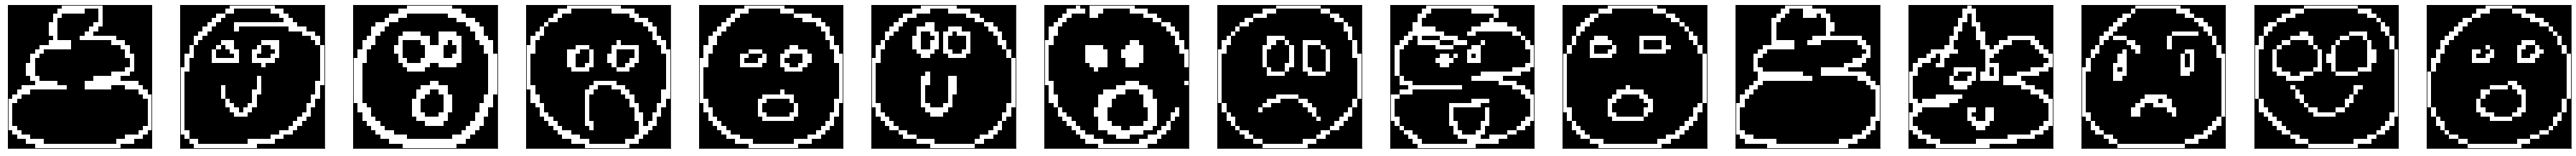

In [ ]:
n = 15
imgs = X.copy()
np.random.shuffle(imgs)
plt.figure(figsize=(64, 64))
for i in range(n):
  # Display image
  ax = plt.subplot(3, n, i+1)
  plt.imshow(imgs[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

## Evaluación de modelos clásicos de aprendizaje supervisado

### Modelo lineal de clasifiación (SVM lineal)

GridSearch para encontrar los mejores para

In [ ]:
clf = SVC(kernel='linear')
parameter_space = {
    'C': np.linspace(0.1, 2, 20)
}
clf = GridSearchCV(clf, parameter_space, n_jobs=1, cv=5, scoring=['accuracy', 'recall_micro'], refit='accuracy')
results = clf.fit(X, y)
param_c = results.best_params_['C']

print('Best parameters')
print(f'C: {param_c}')

Best parameters
C: 0.1


In [ ]:
splits = 5
skf = StratifiedKFold(n_splits = splits)
acc = 0 
recall = np.zeros(5)

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = SVC(kernel='linear', C=param_c)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  acc += accuracy_score(y_test, y_pred)
  recall += recall_score(y_test, y_pred, average = None)

print(f'Accuracy of the modelo: {acc/splits}')
print(f'Recall for each class: ')
print(recall/splits)

Accuracy of the modelo: 0.7165991902834008
Recall for each class: 
[0.55071287 0.75628033 0.99207921 0.54554335 0.7190099 ]


### Modelo no lineal de clasificación (SVM radial)

In [ ]:
clf = SVC(kernel='rbf')
parameter_space = {
    'C': np.linspace(0.1, 2, 20),
    'gamma': ['scale', 'auto']
}
clf = GridSearchCV(clf, parameter_space, n_jobs=1, cv=5, scoring=['accuracy', 'recall_micro'], refit='accuracy')
results = clf.fit(X, y)
param_c = results.best_params_['C']
param_gamma = results.best_params_['gamma']

print('Best parameters')
print(f'C: {param_c}')
print(f'gamma: {param_gamma}')

Best parameters
C: 1.9
gamma: scale


In [ ]:
splits = 5
skf = StratifiedKFold(n_splits = splits)
acc = 0 
recall = np.zeros(5)
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = SVC(kernel='rbf', C=param_c, gamma=param_gamma)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  acc += accuracy_score(y_test, y_pred)
  recall += recall_score(y_test, y_pred, average = None)

print(f'Accuracy of the modelo: {acc/splits}')
print(f'Recall for each class: ')
print(recall/splits)

Accuracy of the modelo: 0.7574898785425102
Recall for each class: 
[0.58649505 0.8310231  0.99405941 0.58522589 0.77085149]


### Modelo Perceptrón multicapa

In [ ]:
clf = MLPClassifier(activation='relu', solver='adam')
parameter_space = {
    'hidden_layer_sizes': [(20), (20, 20), (20, 20, 20), (20, 20, 20, 20), (20, 20, 20, 20, 20)],
    'alpha': np.linspace(0.001, 2, 3),
}
clf = GridSearchCV(clf, parameter_space, n_jobs=1, cv=5, scoring=['accuracy', 'recall_micro'], refit='accuracy')
results = clf.fit(X, y)
param_layers = results.best_params_['hidden_layer_sizes']
param_alpha = results.best_params_['alpha']

print('Best parameters')
print(f'Layers: {param_layers}')
print(f'Alpha: {param_alpha}')

Best parameters
Layers: (20, 20)
Alpha: 2.0


In [ ]:
splits = 5
skf = StratifiedKFold(n_splits = splits)
acc = 0 
recall = np.zeros(5)
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = MLPClassifier(hidden_layer_sizes = param_layers, 
                      activation = 'relu', 
                      solver = 'adam', 
                      alpha = param_alpha)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  acc += accuracy_score(y_test, y_pred)
  recall += recall_score(y_test, y_pred, average = None)

print(f'Accuracy of the modelo: {acc/splits}')
print(f'Recall for each class: ')
print(recall/splits)

Accuracy of the modelo: 0.7461538461538462
Recall for each class: 
[0.54475248 0.77202485 0.99405941 0.61623932 0.78873267]
